In [5]:
using Distributions
using GSL
using Plots
gr()

Plots.GRBackend()

### 事後分布の平均( $\mu$ )の推論   
$\lambda=\sigma^{-2}$

In [2]:
function training_parameter(lambda, x, lambda_mu, m)
    n = length(x)
    x_sum = sum(x)
    lambda_hat = n * lambda + lambda_mu
    m_hat = (lambda * x_sum + lambda_mu * m) / lambda_hat
    println("μ hat:", m_hat)
    println("λ hat:", lambda_hat)
    return lambda_hat, m_hat
end

function plot_predict(m_hat, sigma_hat, r)
    d = Normal(m_hat, sigma_hat)
    y = pdf.(d, r)
    plot!(r, y)
end

plot_predict (generic function with 1 method)

In [3]:
# number of data
N = 100

# true parameter
mu = 0
sigma = 1

# parameter
m = 2
lambda_mu = 1

# range
r = range(-10, stop=10, step=0.01)

# defult
d = Normal(mu, sigma)
X = rand(d, N)
print()

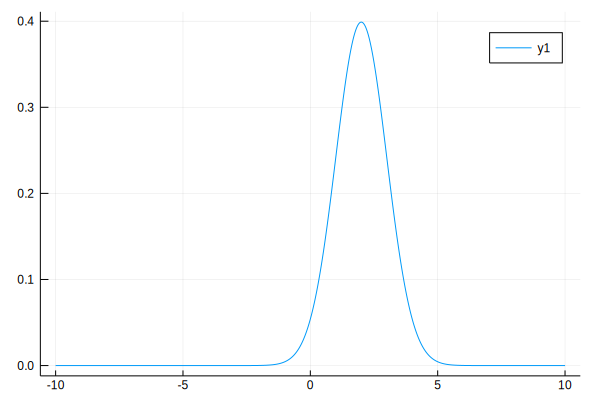

In [4]:
# no training
d = Normal(m, lambda_mu^-0.5)
y = pdf.(d, r)
plot(r, y)

μ hat:0.09440835765621554
λ hat:11.0


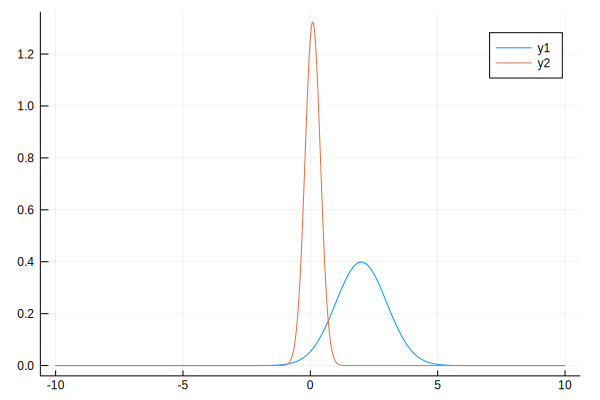

In [5]:
# N=10
lambda_hat, m_hat = training_parameter(sigma^-2, X[1:10], lambda_mu, m)
plot_predict(m_hat, lambda_hat^-0.5, r)

μ hat:0.19754788006478663
λ hat:51.0


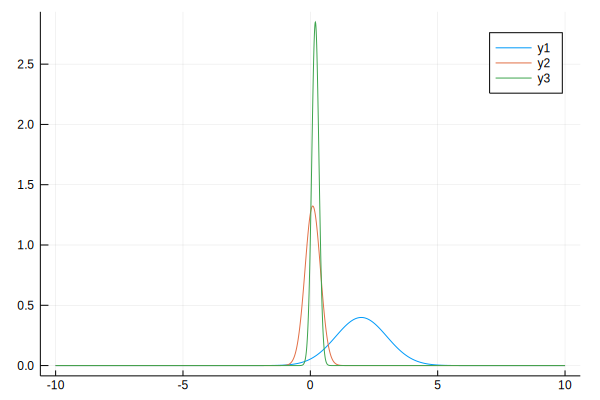

In [6]:
# N=50
lambda_hat, m_hat = training_parameter(sigma^-2, X[1:50], lambda_mu, m)
plot_predict(m_hat, lambda_hat^-0.5, r)

μ hat:0.1411969869541752
λ hat:101.0


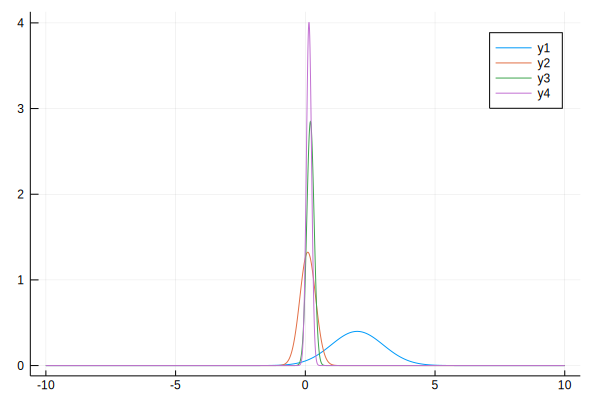

In [7]:
# N=100
lambda_hat, m_hat = training_parameter(sigma^-2, X[1:100], lambda_mu, m)
plot_predict(m_hat, lambda_hat^-0.5, r)

### 平均( $\mu$ )の予測分布の予測

In [8]:
# μ and λ
mu_ast = m_hat
lambda_ast = (sigma^-2 * lambda_hat) / (sigma^-2 + lambda_hat)
println("μ:", mu_ast)
println("λ:", lambda_ast)

μ:0.1411969869541752
λ:0.9901960784313726


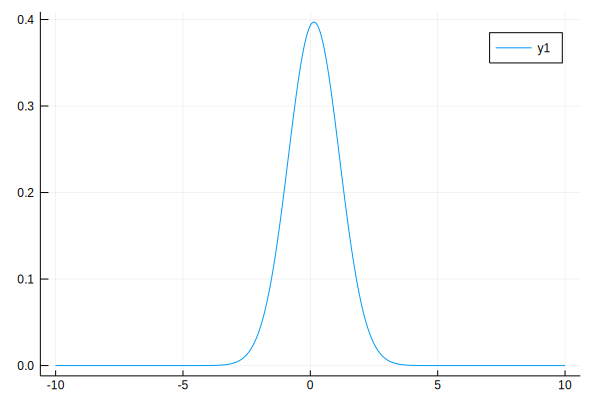

In [9]:
d = Normal(mu_ast, lambda_ast^-0.5)
y = pdf.(d, r)
plot(r, y)

### 事後分布の精度( $\lambda$ )の推論

JuliaのDistributionsのGamma()はパラメータとして $a, \theta$ を取る   
$\theta = b^{-1}$

In [103]:
function training_parameter(mu, x, a, b)
    n = length(x)
    xmu_sum = 0
    for i in 1:n
        xmu_sum += (x[i] - mu)^2
    end
    
    a_hat = n / 2 + a
    b_hat = 0.5 * xmu_sum + b
    println("a hat:", a_hat)
    println("b hat:", b_hat)
    return a_hat, b_hat
end

function plot_predict(a, b, r, la)
    d = Gamma(a, b^-1)
    y = pdf.(d, r)
    println("lambda:", mean(d))
    plot!(r, y, xlabel="lambda", label=la)
end

plot_predict (generic function with 2 methods)

μ:0
σ:2


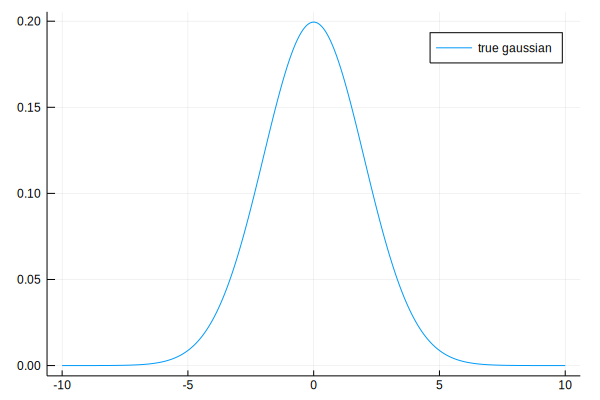

In [115]:
# number of data
N = 100

# true parameter
mu = 0
sigma = 2

# parameter
a = 2
b = 2

# range
r = range(0, stop=10, step=0.01)

# label
l = ["no training", "n=10", "n=50", "n=100"]

# defult
d = Normal(mu, sigma)
X = rand(d, N)
println("μ:", mu)
println("σ:", sigma)
plot(range(-10, stop=10, step=0.01), pdf.(d, range(-10, stop=10, step=0.01)), label="true gaussian")

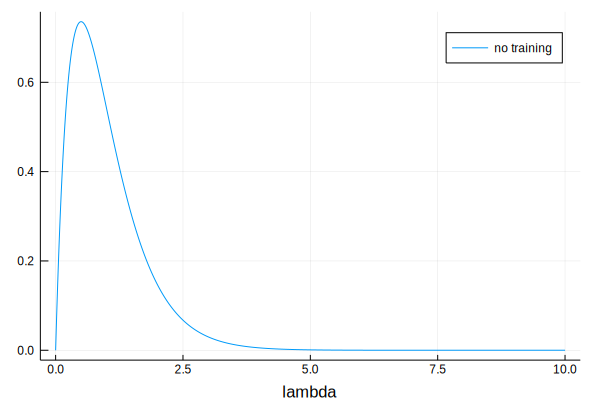

In [116]:
# no training
d = Gamma(a, b^-1)
y = pdf.(d, r)
plot(r, y, xlabel="lambda", label=l[1])

a hat:7.0
b hat:24.800075495885146
lambda:0.2822572052718729


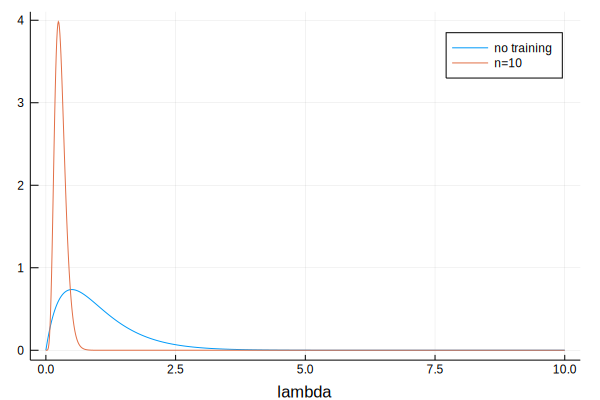

In [117]:
# N=10
a_hat, b_hat = training_parameter(mu, X[1:10], a, b)
plot_predict(a_hat, b_hat, r, l[2])

a hat:27.0
b hat:102.57103061668779
lambda:0.2632322190551065


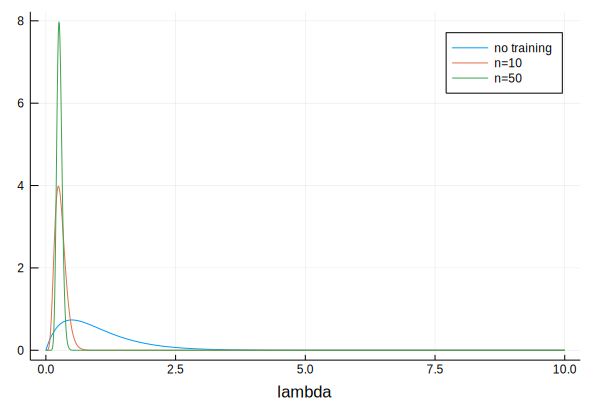

In [118]:
# N=50
a_hat, b_hat = training_parameter(mu, X[1:50], a, b)
plot_predict(a_hat, b_hat, r, l[3])

a hat:52.0
b hat:217.73804368035263
lambda:0.2388190833400611


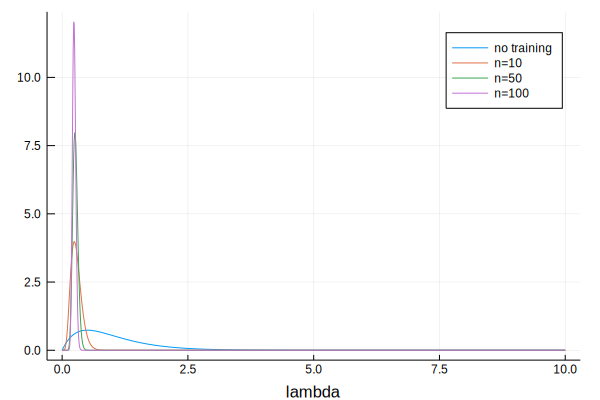

In [119]:
# N=100
a_hat, b_hat = training_parameter(mu, X[1:100], a, b)
plot_predict(a_hat, b_hat, r, l[4])

### 予測分布
Distributionsのt分布はパラメータが1つなので，自作する   
$ St(x|\mu_s, \lambda_s, \nu_s)=\frac{\Gamma(\frac{\nu_s+1}{2})}{\Gamma(\frac{\nu_s}{2})} (\frac{\lambda_s}{\pi\nu_s})^\frac{1}{2} \{1+\frac{\lambda_s}{\nu_s}(x-\mu_s)^2\}^{-\frac{\nu_{s}+1}{2}} $

In [109]:
function student_TDist(x, mu_s, lam_s, nu_s)
    exponent = -(nu_s + 1) / 2
    return sf_gamma((nu_s + 1) / 2) / sf_gamma(nu_s / 2) * (lam_s / π * nu_s)^0.5 * (1 + (lam_s / nu_s) * (x - mu_s)^2)^exponent
end

student_TDist (generic function with 1 method)

In [120]:
X = range(-10, stop=10, step=0.01)
y = []

for i in 1:length(X)
    push!(y, student_TDist(X[i], mu, (a_hat/b_hat), 2*a_hat))
end

μ:0
σ:1.0097563285948026


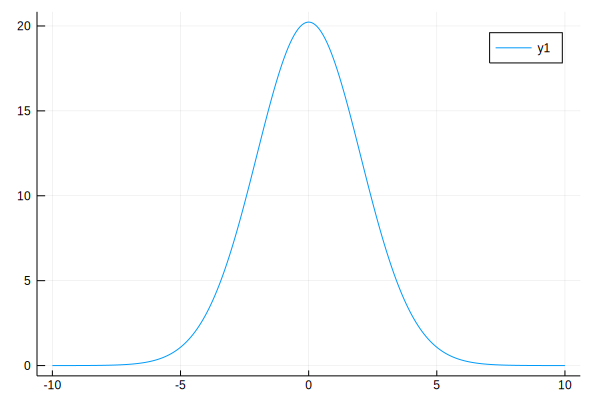

In [122]:
nu = 2 * a_hat
println("μ:", mu)
println("σ:", (nu/(nu-2))^0.5)
plot(X, y, xlabel)